In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pylab as pl

In [6]:
dataset = pd.read_csv('C:/Users/SUPRITH KS\Documents/Visual Studio/Projects/twitterf-main/data/twitter_dataset.csv', encoding = 'latin-1')
dataset.head()

,name_wt,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,0.600000,195,19,53,58,0,0
1,0.705882,9,67,555,2,1,0
2,0.916667,20,21,267,0,0,1
3,0.500000,28,16,325,0,0,1
4,0.733333,45,20,515,0,0,1


## CREATE NEW DATASET WITHOUT LABELS

In [7]:
features=[]
for attributes in dataset.columns:
    if attributes != 'label':
        features.append(attributes)
features

['name_wt',
 'statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count']

In [8]:
y = np.array(dataset['label'])
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [9]:
X = np.array(dataset.drop(['label'], 1).astype(float))
X

C:\Users\SUPRITH KS\AppData\Local\Temp\ipykernel_4472\2360218033.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataset.drop(['label'], 1).astype(float))


array([[6.00000000e-01, 1.95000000e+02, 1.90000000e+01, 5.30000000e+01,
        5.80000000e+01, 0.00000000e+00],
       [7.05882353e-01, 9.00000000e+00, 6.70000000e+01, 5.55000000e+02,
        2.00000000e+00, 1.00000000e+00],
       [9.16666667e-01, 2.00000000e+01, 2.10000000e+01, 2.67000000e+02,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [8.33333333e-01, 1.73000000e+03, 3.81000000e+02, 8.21000000e+02,
        2.18000000e+02, 0.00000000e+00],
       [8.82352941e-01, 1.53650000e+04, 3.81300000e+03, 1.50500000e+03,
        5.50000000e+02, 6.30000000e+01],
       [9.33333333e-01, 3.00000000e+00, 0.00000000e+00, 2.40000000e+01,
        0.00000000e+00, 0.00000000e+00]])

## FIND OPTIMAL NUMBER OF CLUSTERS

In [10]:
#normalizing the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[6.00000000e-01, 2.44128399e-03, 4.65262065e-05, 4.14937759e-03,
        1.30780852e-03, 0.00000000e+00],
       [7.05882353e-01, 1.12674646e-04, 1.64066097e-04, 4.34510295e-02,
        4.50968455e-05, 1.34408602e-03],
       [9.16666667e-01, 2.50388102e-04, 5.14237019e-05, 2.09034683e-02,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [8.33333333e-01, 2.16585708e-02, 9.32972878e-04, 6.42762076e-02,
        4.91555616e-03, 0.00000000e+00],
       [8.82352941e-01, 1.92360659e-01, 9.33707502e-03, 1.17826666e-01,
        1.24016325e-02, 8.46774194e-02],
       [9.33333333e-01, 3.75582152e-05, 0.00000000e+00, 1.87896344e-03,
        0.00000000e+00, 0.00000000e+00]])

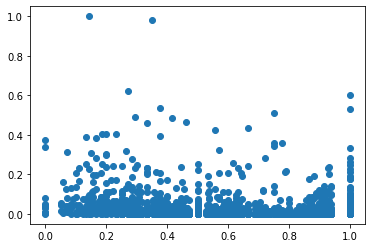

In [11]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], label='True Position')

In [12]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)

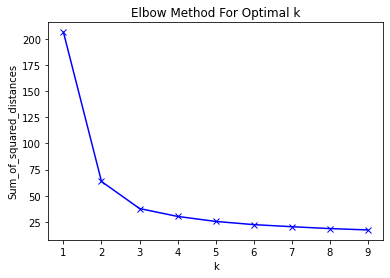

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## PLOT ORIGINAL DATASET USING PCA

In [14]:
#applying PCA on scaled dataset
pca = PCA(n_components=2).fit(X_scaled)
pca_2d = pca.transform(X_scaled)

pca_2d

array([[-0.00410681, -0.0260824 ],
       [-0.10981591, -0.01337433],
       [-0.32059744, -0.01324082],
       ...,
       [-0.23638205,  0.01729881],
       [-0.27965329,  0.20419709],
       [-0.33735728, -0.01844731]])

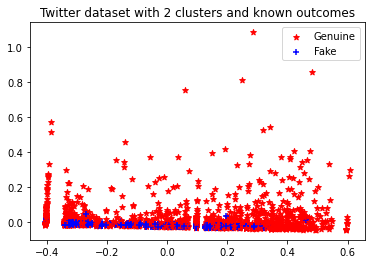

In [15]:
#Plotting original dataset based on lables after applying PCA

for i in range(0, pca_2d.shape[0]):
    if y[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='*')
    
    elif y[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
        
pl.legend([c1, c2], ['Genuine', 'Fake'])
pl.title('Twitter dataset with 2 clusters and known outcomes')
pl.show()

In [16]:
#Thus optimal value for k=2
km = KMeans(n_clusters=2)
km = km.fit(pca_2d)
pca_2d.shape

(2818, 2)

In [17]:
print(km.cluster_centers_)  

[[ 0.1754501  -0.00351231]
 [-0.28835702  0.00577258]]


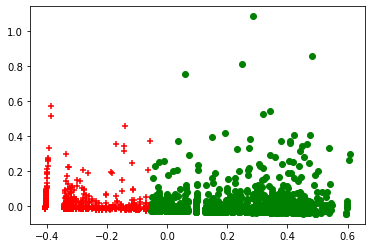

In [18]:
#Plotting the data into two clusters

for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    
    elif km.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')

In [19]:
#Checking predicted labels againest actual labels
correct=0
for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == y[i]:
        #print(km.labels_[i])
        correct+=1

print(correct/len(y))

0.485805535841022
